# Data Scientist Challenge - LATAM Airlines
## Jesús Berríos
## Globant Data Scientist
---

Problema:

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL).

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino
---
Se importan las librerías a utilizar

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Leer dataset

In [96]:
df = pd.read_csv('./input/dataset_SCL.csv')
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
Se procede a explorar los datos. Se responderán estas preguntas en el desarrollo de los comentarios a partir de los análisis/tablas/gráficos generados.

#### Se exploran dtypes, existencias de datos nulos y duplicados:

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [98]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


##### Comentarios
* No hay existencia de datos nulos ni duplicados
* Algunos columnas presentan DType object, por lo que podrían contener strings

#### Cantidad de datos por Aerolínea y tipo de vuelo

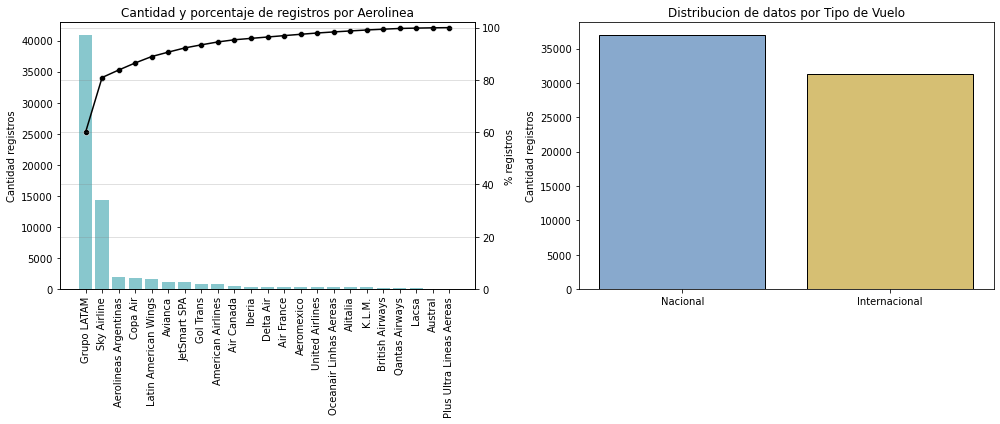

In [99]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad y porcentaje de registros por Aerolinea')
sns.barplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts(),ax=ax,color='#7DD1D8')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Cantidad registros')
ax2 = ax.twinx()
ax2.set_ylabel('% registros')
ax2.grid(color='grey',linestyle='-',alpha=0.3)
sns.lineplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
sns.scatterplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
ax2.set_ylim([0,102])


ax = axes[1]
ax.set_title('Distribucion de datos por Tipo de Vuelo')
sns.barplot(x=df.TIPOVUELO.value_counts().index.map({'I':'Internacional','N':'Nacional'}),y=df.TIPOVUELO.value_counts(),ax=ax,palette=['#7DA8D8','#E7C862'],edgecolor='k')
ax.set_ylabel('Cantidad registros')
#ax.tick_params(axis='x', labelrotation = 90)

fig.tight_layout()

##### Comentarios
* La aerolínea de operación que presenta mayor cantidad de registros es LATAM, con alrededor de 40000 filas. Esta categoría compone alrededor el 60% del dataset.
* La aerolínea Sky, con casi 15000 registros concentra alrededor del 20% de los datos.
* La cantidad de datos por aerolínea restante compone el 20% del total, en el que ninguna representa más del 10% de la muestra.
* La distribución de datos por tipo de vuelo está relativamente balanceada, siendo la muestra de datos de vuelos nacionales ligeramente mayor con respecto a la cantidad de vuelos internacionales.

#### Cantidad de Vuelos Origen-Destino para Rutas Nacionales e Internacionales

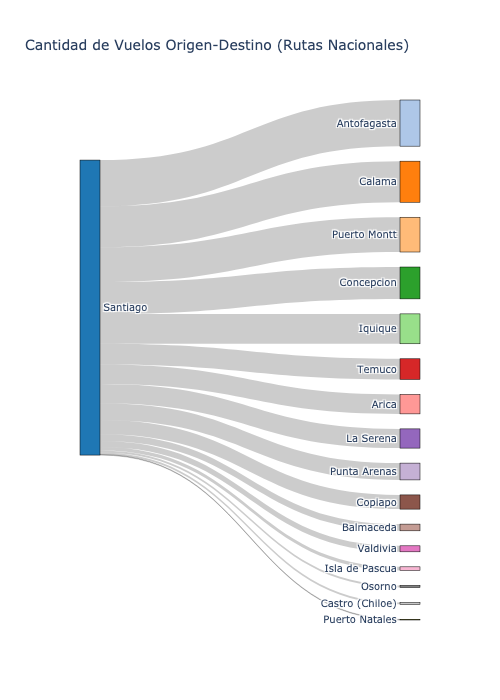

In [100]:
dfsn = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='N'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False)
dfsn['vuel_p'] = dfsn.vuelos_qty/dfsn.vuelos_qty.sum()*100

# Generate data 
lab=dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()
position_list = [*range(0,len(dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()))]
sou = [lab.index(x) for x in dfsn.SIGLAORI]
dest = [lab.index(x) for x in dfsn.SIGLADES]
color_n = [str(sns.color_palette('tab20').as_hex()[x]) for x in range(0,len(lab))]

#Plot Sankey for National
fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab,
      color = color_n
    ),
    link = dict(
      source = sou, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest,
      value = dfsn.vuelos_qty.values.tolist(),
      customdata = dfsn.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Nacionales)", font_size=10,width=500, height=700)
fig.show("png")

##### Comentarios:
* Todos los vuelos nacionales tienen como Origen la Ciudad de Santiago
* Las ciudades con mayor cantidad de vuelos son Antofagasta, con 5786 vuelos (15.65% de los vuelos nacionales); y Calama con 5146 vuelos (13.92% de los vuelos nacionales)
* La imagen se muestra en formato "png" con la finalidad de poder visualizarla desde github. Para poder apreciar el gráfico en HTML, el cual es interactivo y se puede ver el detalle de los datos al posicionar el cursor, se debe ejecutar la siguiente celda.

In [101]:
fig.show()

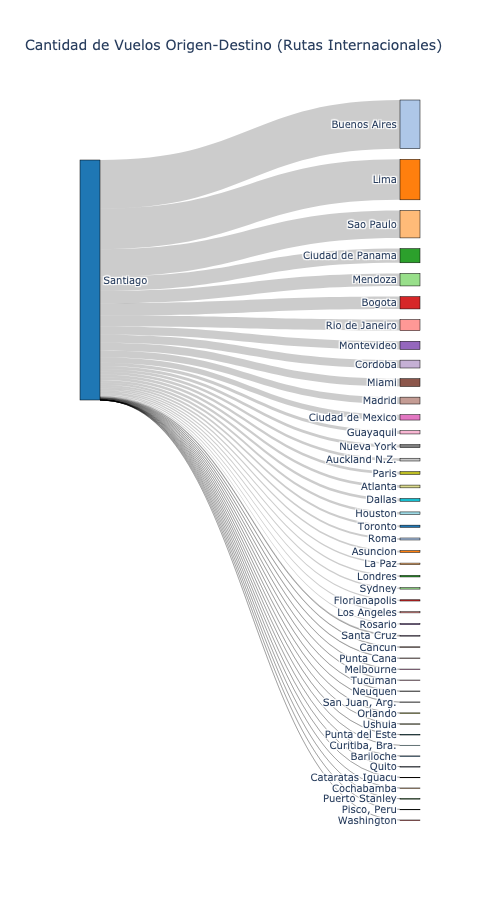

In [102]:
dfsi = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='I'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False).reset_index(drop=True)
dfsi['vuel_p'] = dfsi.vuelos_qty/dfsi.vuelos_qty.sum()*100

lab_i=dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()
position_list_i = [*range(0,len(dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()))]
sou_i = [lab_i.index(x) for x in dfsi.SIGLAORI]
dest_i = [lab_i.index(x) for x in dfsi.SIGLADES]
pal_i = sns.color_palette('tab20').as_hex()*4
color_i = [str(pal_i[x]) for x in range(0,len(lab_i))]

fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab_i,
      color = color_i
    ),
    link = dict(
      source = sou_i, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest_i,
      value = dfsi.vuelos_qty.values.tolist(),
      customdata = dfsi.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Internacionales)", font_size=10,width=500, height=900)
fig.show("png")

##### Comentarios
* Todos los vuelos internacionales tienen como Origen la Ciudad de Santiago
* Los 10 principales destinos internacionales se encuentran en el continente Americano. El destino intercontinental con más vuelos es Madrid, con 894 vuelos (2.86% de la muestra).
* Las tres principales rutas internacionales son Santiago-Buenos Aires (6335 vuelos, 20.28%), Santiago-Lima (5270 vuelos, 16.87%) y Santiago-Sao Paulo (3569 vuelos, 11.42%).
* La imagen se muestra en formato "png" con la finalidad de poder visualizarla desde github. Para poder apreciar el gráfico en HTML, el cual es interactivo y se puede ver el detalle de los datos al posicionar el cursor, se debe ejecutar la siguiente celda.

In [103]:
fig.show()

#### Cantidad de vuelos de acuerdo a temporalidad de operación de vuelo

In [104]:
df['hora_o'] = df['Fecha-O'].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')))

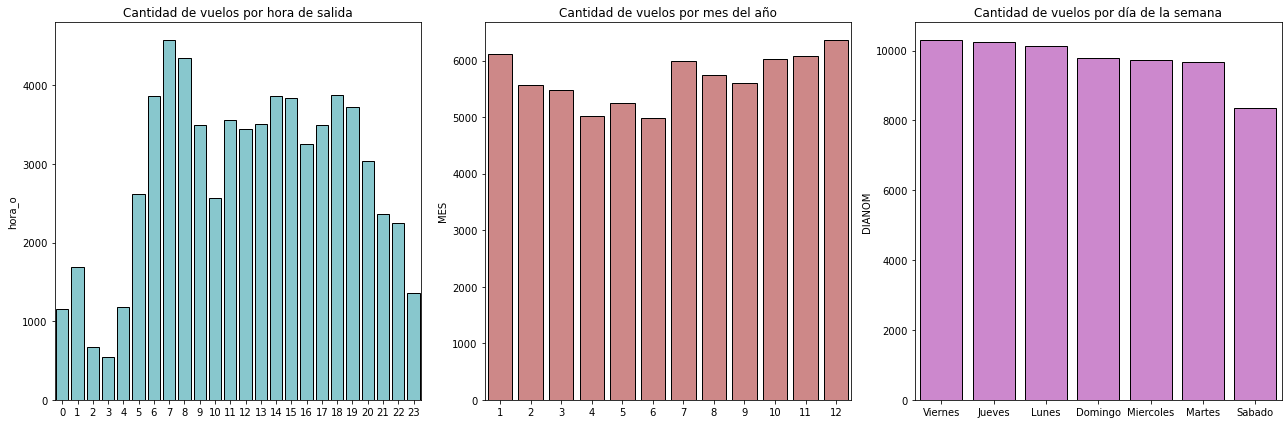

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad de vuelos por hora de salida')
sns.barplot(x=df.hora_o.value_counts().sort_index().index,y=df.hora_o.value_counts().sort_index(),ax=ax,color='#7DD1D8',edgecolor='k')
#sns.distplot(df.hora_o,bins=24,hist_kws=dict(edgecolor="black"),ax=ax)

ax = axes[1]
ax.set_title('Cantidad de vuelos por mes del año')
sns.barplot(x=df.MES.value_counts().index,y=df.MES.value_counts(),ax=ax,color='#D87D7D',edgecolor='k')
#ax.tick_params(axis='x', labelrotation = 90)

ax = axes[2]
ax.set_title('Cantidad de vuelos por día de la semana')
sns.barplot(x=df.DIANOM.value_counts().index,y=df.DIANOM.value_counts(),ax=ax,color='#D77DD8',edgecolor='k')

fig.tight_layout()

##### Comentarios
* Se observa gran concentración de vuelos entre las 6-9am, 2-4pm y 6-8pm; mientras que el horario con menos vuelos es 2-4am.
* Los meses con mayor cantidad de vuelos son Diciembre y Enero, y se puede decir que la temporada más baja está desde Abril hasta inicios de Julio.
* El día más concurrido es el Viernes, mientras que el Sábado es el que posee menor cantidad de vuelos.

#### Existen varias columnas que muestran datos programados y pueden compararse con los datos de operación

In [106]:
print('Comparaciones Datos de Vuelos Programados vs. Operación')

for i,j in zip(['Vlo','Ori','Des','Emp'],['Número de Vuelo','Código Ciudad Origen','Código Ciudad Destino','Código Aerolínea']):
    print(j)
    comparison_io = df[i+'-I']==df[i+'-O']
    print(comparison_io.value_counts(normalize=True)*100)
    print('')

Comparaciones Datos de Vuelos Programados vs. Operación
Número de Vuelo
True     97.287629
False     2.712371
dtype: float64

Código Ciudad Origen
True    100.0
dtype: float64

Código Ciudad Destino
True     99.958948
False     0.041052
dtype: float64

Código Aerolínea
True     72.628508
False    27.371492
dtype: float64



In [107]:
df[df['Emp-I']!=df['Emp-O']][['Emp-I','Emp-O','OPERA','SIGLAORI']]\
    .groupby(['Emp-I','Emp-O','OPERA'])[['SIGLAORI']].count().reset_index().rename(columns={'SIGLAORI':'cnt'})\
        .sort_values('cnt',ascending=False).reset_index(drop=True)

,Emp-I,Emp-O,OPERA,cnt
0,LAN,LXP,Grupo LATAM,14549
1,LAW,JMR,Latin American Wings,1547
2,LAN,LPE,Grupo LATAM,1210
3,LAN,DSM,Grupo LATAM,491
4,LAN,LNE,Grupo LATAM,373
5,AVA,LRC,Avianca,265
6,QFU,QFA,Qantas Airways,195
7,LAW,56R,Latin American Wings,17
8,LAW,48O,Latin American Wings,10
9,ARG,AUT,Aerolineas Argentinas,5


##### Comentarios
* En los datos programados vs. operación se pueden observar pequeñas inconsistencias de datos para el número de vuelo y el código de ciudad destino. De esto se puede asumir que por alguna circunstancia el número de vuelo puede variar, o que pueden existir escenarios que puedan cambiar el destino del vuelo de acuerdo al planeado (por ejemplo, condiciones climatológicas).
* Los datos de código ciudad origen programado vs. operación son 100% consistentes.
* Con respecto a los datos del código de aerolínea programado respecto al de operación se tiene una inconsistencia para el 27.37% de los registros. Se puede observar que la mayoría de estos registros se presentan para Grupo Latam, cuya operación es reemplazada por LXP (Latam Express). Aun así, hay gran cantidad de registros (miles), que sustituyen a la operación planificada de Latam.

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
* atraso_15 : 1 si dif_min > 15, 0 si no.
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

#### Se generan columnas con features requeridos

In [108]:
# Se cambian formatos de columnas a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'],format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'],format='%Y-%m-%d %H:%M:%S')

# Se genera feature temporada_alta
df['temporada_alta'] = df.apply(lambda x: 1 if \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('15-12','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)<=datetime.strptime('03-03','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('15-07','%d-%m') and x['Fecha-I'].replace(year=1900)<=datetime.strptime('31-07','%d-%m')) or \
                                            (x['Fecha-I'].replace(year=1900)>=datetime.strptime('11-09','%d-%m') and x['Fecha-I'].replace(year=1900)<=datetime.strptime('30-09','%d-%m')) 
                                            else 0,axis=1)

df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,hora_o,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,23,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,23,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,23,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,23,1


In [110]:
#Verificación de resultados
check = df[['MES','DIA']][df.temporada_alta==1].groupby(['MES','DIA']).last().reset_index().sort_values(['MES','DIA'])

for index,row in check.iterrows():
    print(row['MES'],row['DIA'])

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
3 1
3 2
3 3
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31


In [111]:
# Se generan feature dif_min, atraso_15 y periodo_dia
df['dif_min'] = (df['Fecha-O']-df['Fecha-I']).dt.total_seconds()/60

df['atraso_15'] = np.where(df.dif_min>15,1,0)

#periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .
df['periodo_dia'] = np.where((df.hora_o>=5) & (df.hora_o<12),'mañana',
                        np.where((df.hora_o>=12) & (df.hora_o<19),'tarde',
                            np.where(((df.hora_o>=19) & (df.hora_o<=23)) | ((df.hora_o>=0) & (df.hora_o<5)),'noche','error')))
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,hora_o,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,23,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,23,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,23,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,23,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,23,1,-2.0,0,noche


In [112]:
# Verificación
df.periodo_dia.value_counts()

tarde     25256
mañana    24991
noche     17959
Name: periodo_dia, dtype: int64

#### Generación de archivo

In [113]:
df.to_csv('./synthetic_features.csv')

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

Se efectúan visualizaciones para observar cómo se comporta la tasa de atraso respecto a las distintas variables:

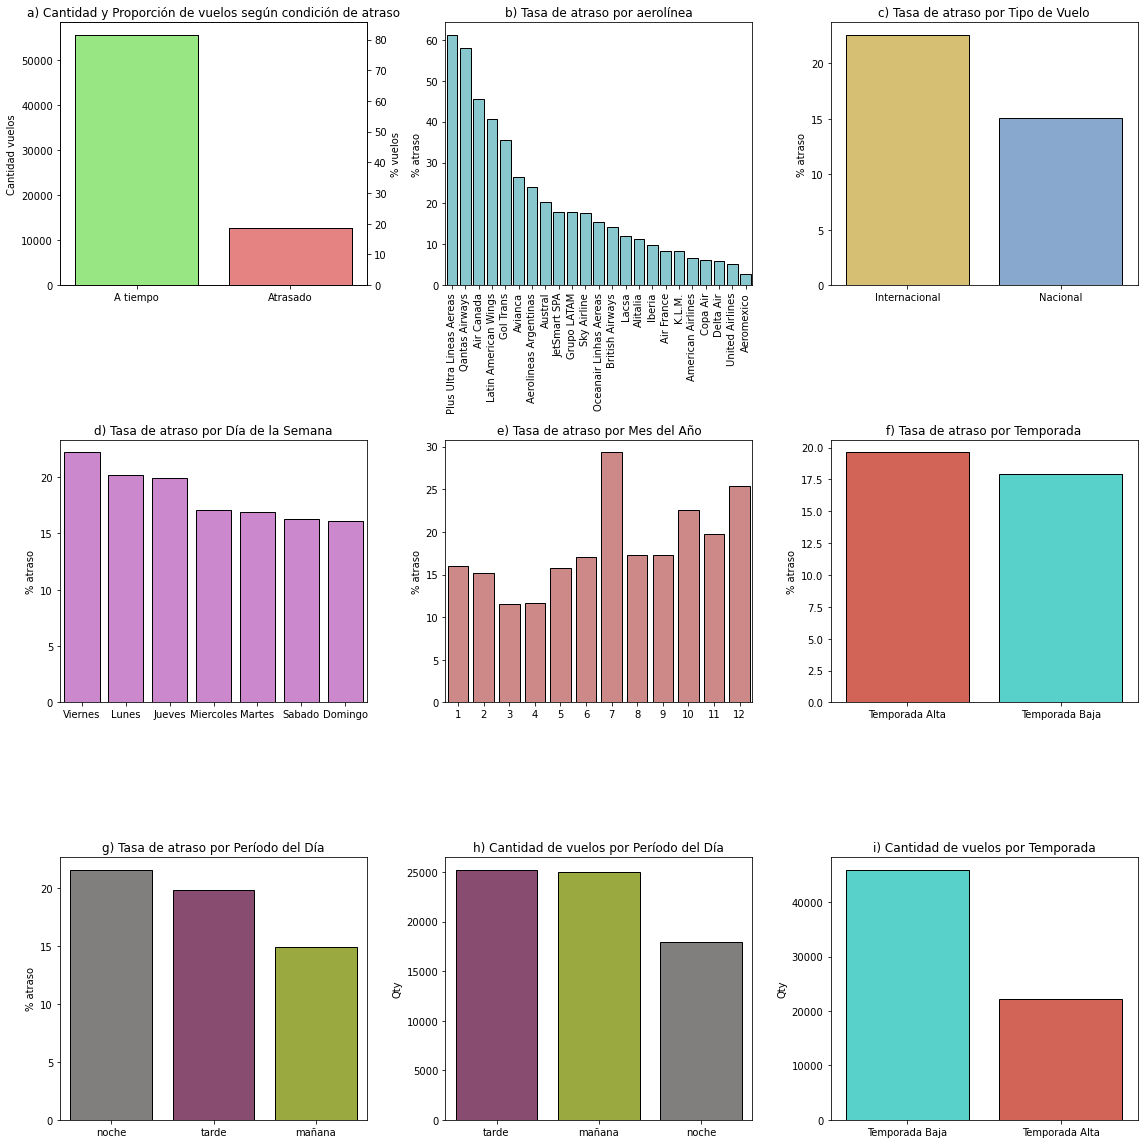

In [115]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(16,16))
axes = axes.flatten()

ax = axes[0]
sns.barplot(x=df.atraso_15.value_counts().index.map({0:'A tiempo',1:'Atrasado'}),y=df.atraso_15.value_counts(),ax=ax,palette=['#8FF573','#F57373'],edgecolor='k',label=True)
ax2=ax.twinx()
sns.barplot(x=df.atraso_15.value_counts(normalize=True).index.map({0:'A tiempo',1:'Atrasado'}),y=df.atraso_15.value_counts(normalize=True)*100,ax=ax2,palette=['#8FF573','#F57373'],edgecolor='k')
ax.set_title('a) Cantidad y Proporción de vuelos según condición de atraso')
ax.set_ylabel('Cantidad vuelos')
ax2.set_ylabel('% vuelos')

ax = axes[1]
y1 = df[df.atraso_15==1].OPERA.value_counts()/df.OPERA.value_counts()
y1 = y1.sort_values(ascending=False)*100
sns.barplot(x=y1.index,y=y1,ax=ax,color='#7DD1D8',edgecolor='k')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_title('b) Tasa de atraso por aerolínea')
ax.set_ylabel('% atraso')

ax = axes[2]
y4 = df[df.atraso_15==1].TIPOVUELO.value_counts()/df.TIPOVUELO.value_counts()
y4 = y4.sort_values(ascending=False)*100
sns.barplot(x=y4.index.map({'I':'Internacional','N':'Nacional'}),y=y4,ax=ax,edgecolor='k',palette=['#E7C862','#7DA8D8'])
ax.set_title('c) Tasa de atraso por Tipo de Vuelo')
ax.set_ylabel('% atraso')

ax = axes[3]
y3 = df[df.atraso_15==1].DIANOM.value_counts()/df.DIANOM.value_counts()
y3 = y3.sort_values(ascending=False)*100
sns.barplot(x=y3.index,y=y3,ax=ax,color='#D77DD8',edgecolor='k')
ax.set_title('d) Tasa de atraso por Día de la Semana')
ax.set_ylabel('% atraso')

ax = axes[4]
y2= df[df.atraso_15==1].MES.value_counts()/df.MES.value_counts()*100
sns.barplot(x=y2.index,y=y2,ax=ax,color='#D87D7D',edgecolor='k')
ax.set_title('e) Tasa de atraso por Mes del Año')
ax.set_ylabel('% atraso')

ax = axes[5]
y5 = df[df.atraso_15==1].temporada_alta.value_counts()/df.temporada_alta.value_counts()
y5 = y5.sort_values(ascending=False)*100
sns.barplot(x=y5.index.map({0:'Temporada Baja',1:'Temporada Alta'}),y=y5,ax=ax,edgecolor='k',palette=['#E65342','#42E6DC'])
ax.set_title('f) Tasa de atraso por Temporada')
ax.set_ylabel('% atraso')

ax = axes[6]
y6 = df[df.atraso_15==1].periodo_dia.value_counts()/df.periodo_dia.value_counts()
y6 = y6.sort_values(ascending=False)*100
sns.barplot(x=y6.index,y=y6,ax=ax,edgecolor='k',palette=['#817F7E','#924274','#A6BB2F'])
ax.set_title('g) Tasa de atraso por Período del Día')
ax.set_ylabel('% atraso')

ax = axes[7]
sns.barplot(x=df.periodo_dia.value_counts().index,y=df.periodo_dia.value_counts(),ax=ax,edgecolor='k',palette=['#924274','#A6BB2F','#817F7E'])
ax.set_title('h) Cantidad de vuelos por Período del Día')
ax.set_ylabel('Qty')

ax = axes[8]
sns.barplot(x=df.temporada_alta.value_counts().index.map({0:'Temporada Baja',1:'Temporada Alta'}),y=df.temporada_alta.value_counts(),ax=ax,palette=['#42E6DC','#E65342'],edgecolor='k')
ax.set_title('i) Cantidad de vuelos por Temporada')
ax.set_ylabel('Qty')


fig.tight_layout()

#### Primeros comentarios tasa de atraso:

***a) Cantidad y Proporción de vuelos según condición de atraso:*** De los 68206 vuelos totales, hay más de 50000 vuelos que despegan a tiempo, con respecto a más de 10000 que despegan en atraso. Los vuelos en atraso representan casi un 20% del dataset.

***b) Tasa de atraso por aerolínea:*** Se puede observar que hay aerolíneas que presentan una tasa relevante de atraso, sin embargo, se conoce del punto 1 que Sky y Latam componen el 80% de la muestra, por lo que habría que comparar la tasa de atraso con la cantidad de vuelos.

***c) Tasa de atraso por Tipo de Vuelo:*** Se Observa que los vuelos Internacionales tienen una tasa de atraso de alrededor del 22%, mientras que los vuelos nacionales de un 15%. Esto podría ser un punto diferenciador ya que podría decirse que hay cierto balance entre vuelos nacionales e internacionales.

***d) Tasa de atraso por Día de la Semana:*** Los días que componen mayor tasa de atraso son los Viernes, Lunes y Jueves (alrededor de un 20%). Mientras que el Sábado y Domingo son los días con menor tasa de atraso, con alrededor de un 15%.

***e) Tasa de atraso por Mes del Año:*** Se puede resaltar que los meses de Diciembre y Julio presentan una tasa de atraso visualmente más alta con respecto al resto, con valores de alrededor de 30% y 25% respectivamente.

***f) Tasa de atraso por Temporada:*** Se observa tasa de atraso similar entre vuelos en temporada alta y baja con valores mayores a 17.5% y menores a 20%.

***g) Tasa de atraso por Período del Día:*** Los vuelos nocturnos presentan una tasa mayor al 20%, mientras que los vuelos en la tarde una tasa ligeramente menor al 20%. Es destacable que los vuelos en la mañana tienen tasa de atraso menor al 15%.

***h) Cantidad de vuelos por Período del Día:*** La cantidad de vuelos en mañana y tarde son similares, mientras que en la noche despegan alrededor de 5000 vuelos menos con respecto a los tiempos mencionados.

***i) Cantidad de vuelos por Temporada:*** Los vuelos en temporada baja corresponden a alrededor de un 2/3 de la muestra, mientras que el 1/3 restante corresponden a vuelos en temporada alta.

De la visualización "b", surge la necesidad de poder comparar la tasa de atraso respecto a la cantidad de valores por cada categoría, para evitar dar importancia a features en donde sólo se diferencien clases que presenten una minoría en la muestra total.

Se procede a efectuar visualizaciones de Cantidad de vuelos y tasa de atraso por:
* Destinos nacionales e internacionales
* Aerolínea
* Día del año
* Hora del día

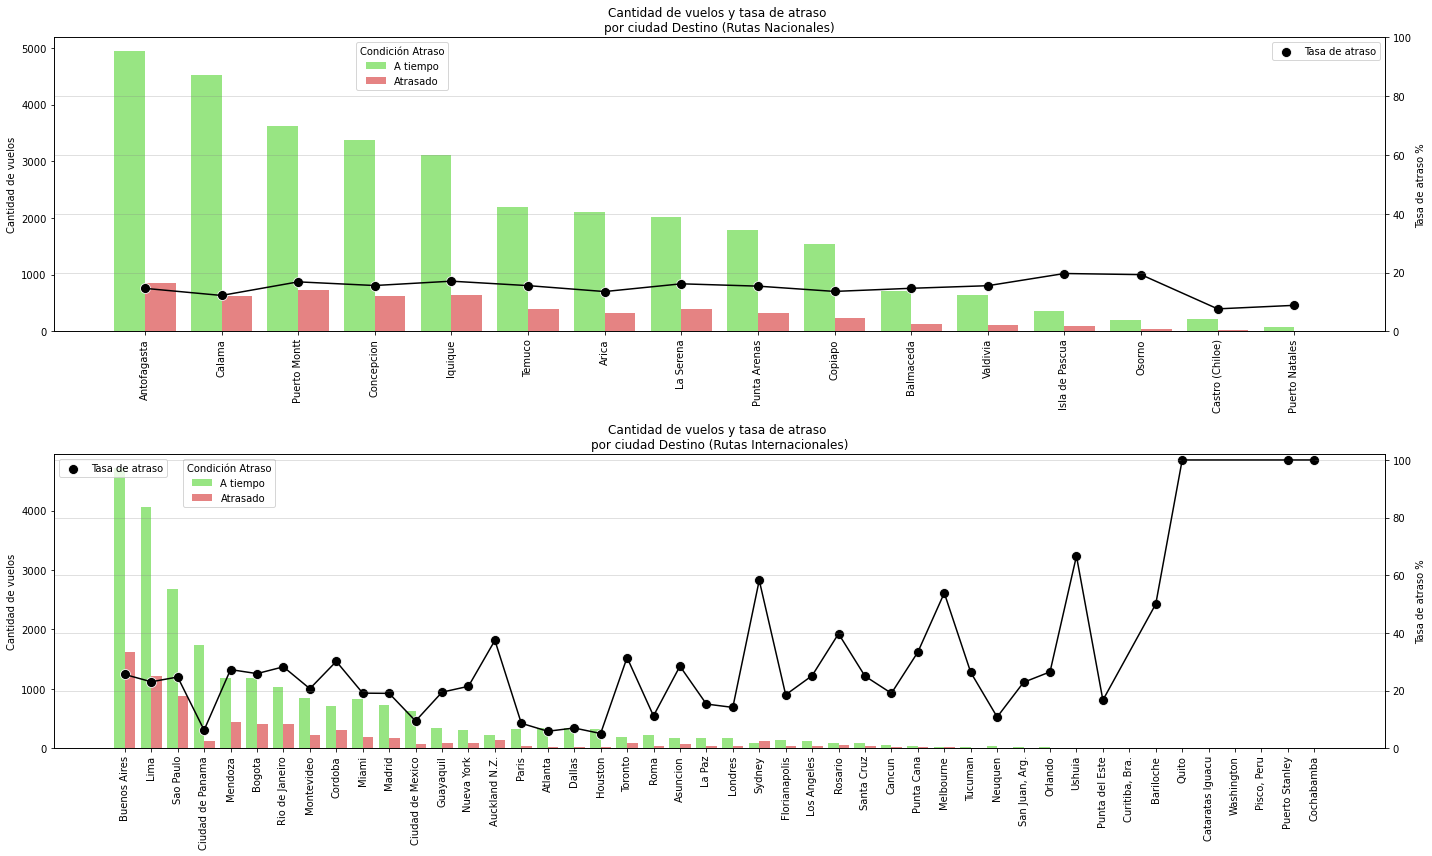

In [118]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,12))
axes = axes.flatten()

ax = axes[0]
#y4 = y4.sort_values(ascending=False)*100
#sns.barplot(x=y4.index,y=y4,ax=ax,color='#7DA8D8',edgecolor='k')
sns.countplot(data=df[(df.TIPOVUELO=='N')],x='SIGLADES',hue='atraso_15',\
                    order=df[(df.TIPOVUELO=='N')].SIGLADES.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], bbox_to_anchor=(0.3,1), title='Condición Atraso')

ax2 = ax.twinx()
y0 = 100*df[(df.atraso_15==1)&(df.TIPOVUELO=='N')].SIGLADES.value_counts()/df[df.TIPOVUELO=='N'].SIGLADES.value_counts()
y0 = y0.reindex(df[(df.TIPOVUELO=='N')].SIGLADES.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')
ax.tick_params(axis='x', labelrotation = 90)
ax2.set_ylim([0,100])
ax.set_title('Cantidad de vuelos y tasa de atraso \npor ciudad Destino (Rutas Nacionales)')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)



ax = axes[1]
# y5 = y5.sort_values(ascending=False)*100
# sns.barplot(x=y5.index,y=y5,ax=ax,color='#E7C862',edgecolor='k')
sns.countplot(data=df[(df.TIPOVUELO=='I')],x='SIGLADES',hue='atraso_15',\
                    order=df[(df.TIPOVUELO=='I')].SIGLADES.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], bbox_to_anchor=(0.17,1), title='Condición Atraso')

ax2 = ax.twinx()
y1 = 100*df[(df.atraso_15==1)&(df.TIPOVUELO=='I')].SIGLADES.value_counts()/df[df.TIPOVUELO=='I'].SIGLADES.value_counts()
y1 = y1.reindex(df[(df.TIPOVUELO=='I')].SIGLADES.value_counts().index)
sns.scatterplot(x=y1.index,y=y1,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y1.index,y=y1,ax=ax2,color='k')
ax.tick_params(axis='x', labelrotation = 90)
ax2.set_ylim([0,102])
ax.set_title('Cantidad de vuelos y tasa de atraso \npor ciudad Destino (Rutas Internacionales)')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


fig.tight_layout()

* Vuelos Nacionales: La tasa de atraso se presenta alrededor del 20% para la mayoría de los destinos, exceptuando los dos menos frecuentes.
* Vuelos Internacionales: Se observa gran variación de la tasa de atraso para estos destinos. Sin embargo, hay muchos destinos que tienen poca cantidad de vuelos y esto afecta el porcentaje de atraso.

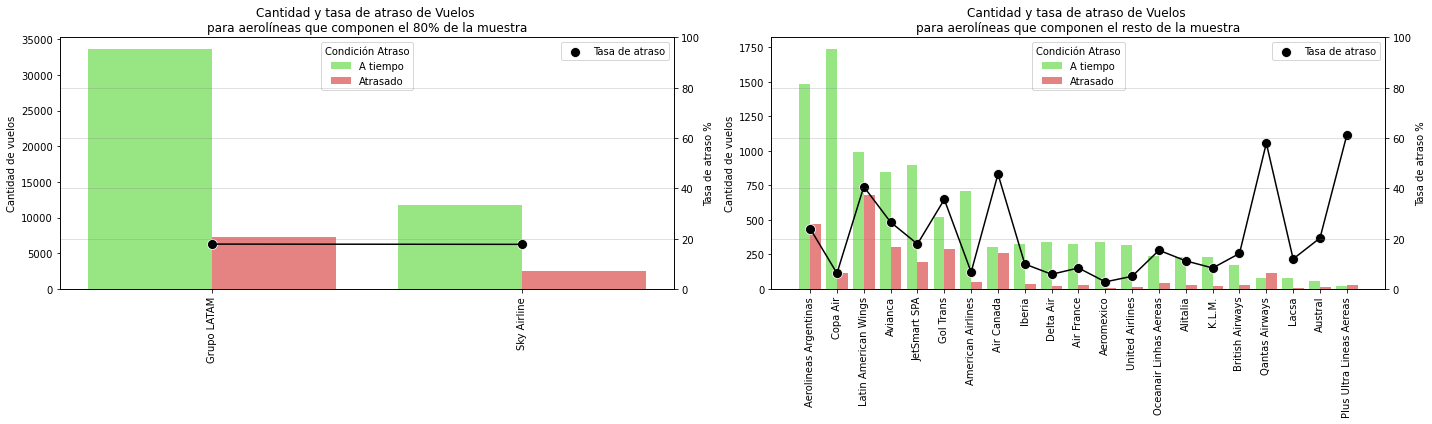

In [119]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axes = axes.flatten()


ax = axes[0]
sns.countplot(data=df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')],x='OPERA',hue='atraso_15',\
                    order=df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')].OPERA.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')

ax2 = ax.twinx()
y0 = 100*df[(df.atraso_15==1)&((df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline'))].OPERA.value_counts()/df[((df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline'))].OPERA.value_counts()
y0 = y0.reindex(df[(df.OPERA=='Grupo LATAM')|(df.OPERA=='Sky Airline')].OPERA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')
ax2.set_ylim([0,100])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_title('Cantidad y tasa de atraso de Vuelos \npara aerolíneas que componen el 80% de la muestra')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


ax = axes[1]
sns.countplot(data=df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')],x='OPERA',hue='atraso_15',\
                    order=df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')].OPERA.value_counts().index,ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
y1 = 100*df[(df.atraso_15==1)&((df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline'))].OPERA.value_counts()/df[((df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline'))].OPERA.value_counts()
y1 = y1.reindex(df[(df.OPERA!='Grupo LATAM')&(df.OPERA!='Sky Airline')].OPERA.value_counts().index)
sns.scatterplot(x=y1.index,y=y1,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y1.index,y=y1,ax=ax2,color='k')
ax2.set_ylim([0,100])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_title('Cantidad y tasa de atraso de Vuelos \npara aerolíneas que componen el resto de la muestra')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)



fig.tight_layout()

* Para las aerolíneas que componen el 80% de la muestra (Latam y Sky), se presenta una tasa de atraso cercana al 20%, muy similar al valor general del atraso.
* Para las demás aerolíneas se presentan más variaciones en la tasa de atraso, aun así, similar al caso de los viajes internacionales, algunas tasas pueden verse sesgadas por la poca cantidad de datos.

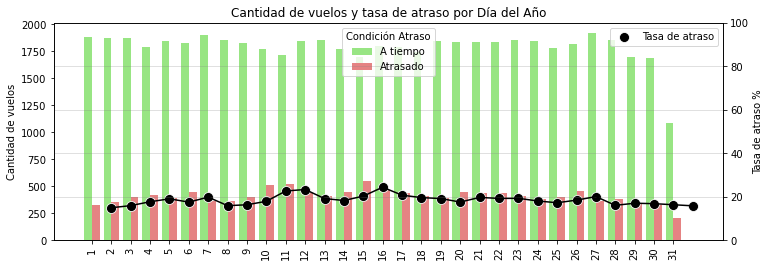

In [120]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df,x='DIA',hue='atraso_15',\
                    #order=df.DIA.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,100])
y0= df[df.atraso_15==1].DIA.value_counts()/df.DIA.value_counts()*100
#y0 = y0.reindex(df.DIA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y tasa de atraso por Día del Año')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


* Se observa mayor tasa de atraso en los vuelos a mitad de mes, aun así la variación es muy pequeña y los valores rondan el 20%, que representa la tasa de atraso general.

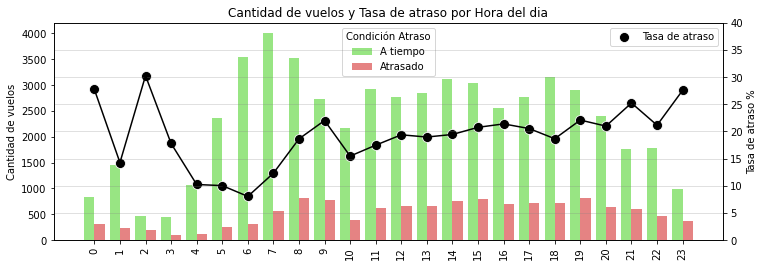

In [47]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df,x='hora_o',hue='atraso_15',\
                    #order=df.DIA.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,40])
y0= df[df.atraso_15==1].hora_o.value_counts()/df.hora_o.value_counts()*100
#y0 = y0.reindex(df.DIA.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y Tasa de atraso por Hora del dia')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)


* Se aprecia que la tasa de atraso tiene grandes fluctuaciones respecto a la hora de salida de los vuelos en las primeras horas de la mañana, para luego estabilizarse alrededor del 20-30%, aunque de igual forma, presenta fluctiaciones.

#### ¿Qué variables esperarías que más influyeran en predecir atrasos?
Las variables que esperaría tengan más influencia en predecir atrasos son aquellas que más puedan separar el target. Sin embargo, ninguna de las variables separa el target directamente, sino que alguna de sus categorías acumulan mayores o menores tasas de atraso. Dado esto, esperaría que las variables más influyentes son aquellas cuyas categorías tienen más fluctuación en la tasa de atraso, como lo son: **destino, hora del día y aerolínea.**

Para complementar esta suposición, se procederá a aplicar un método de Feature Selection.
* Se trabajará sobre las variables: ['Des-O', 'Emp-O','DIANOM', 'TIPOVUELO','temporada_alta','periodo_dia']
* Estas variables son categóricas, y las mismas contienen a cualquier variable que se pueda considerar continua en el dataset. Dado esto, se aplica el método SelectKBest con la prueba estadística chi cuadrado, para medir la dependencia con la variable target.

Se procede a aplicar el método:

Des-O: 5.431883
Emp-O: 41.240751
DIANOM: 11.460728
TIPOVUELO: 240.689008
temporada_alta: 7.918457
periodo_dia: 124.466593


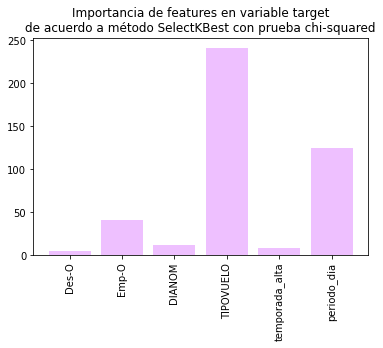

In [150]:
# Selección de columnas, separación de X e Y para Feature selection
df_fs = df[['Des-O', 'Emp-O','DIANOM', 'TIPOVUELO','temporada_alta','periodo_dia','atraso_15']].copy()
Xfs = df_fs[['Des-O', 'Emp-O','DIANOM', 'TIPOVUELO','temporada_alta','periodo_dia']].to_numpy()
Yfs = df_fs['atraso_15'].to_numpy()

# Definición de funciones para la aplicación de los métodos
# Preparar datos input
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# Preparar datos target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# Función para selección de features
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# Separación Train/Test y preparar datos para selección de Features
X_trainfs, X_testfs, y_trainfs, y_testfs = train_test_split(Xfs, Yfs, test_size=0.20, random_state=17)
X_trainfs_enc, X_testfs_enc = prepare_inputs(X_trainfs, X_testfs)
y_trainfs_enc, y_testfs_enc = prepare_targets(y_trainfs, y_testfs)

# Selección de Features
X_train_fs, X_test_fs, fs = select_features(X_trainfs_enc, y_trainfs_enc, X_testfs_enc)

# Imprimir scores de features
for i,k in zip(range(len(fs.scores_)),df_fs[df_fs.columns[0:-1]]):
	print(f'{k}: %f' % (fs.scores_[i]))

# Graficar los scores de los features
plt.bar([i for i in df_fs.columns[0:-1]], fs.scores_,color='#EEC0FF')
plt.xticks(rotation=90)
plt.title('Importancia de features en variable target\nde acuerdo a método SelectKBest con prueba chi-squared')
plt.show()


De acuerdo a los resultados obtenidos mediante el test, se puede apreciar que las variables más influyentes en predecir atrasos pudiesen ser el tipo de vuelo Nacional/Internacional, el período del día o la aerolínea; teniendo que las dos últimas mencionadas coinciden con lo que se había mencionado en la suposición inicial de esta pregunta. Adicionalmente, este test sugiere tomar en cuenta el tipo de vuelo, a pesar de que no separe las clases de la variable target notoriamente, como se pudo apreciar en la exploración de los datos. Sin embargo, la información del tipo de vuelo ya estaría contenida en el destino.

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.Siéntete libre de generar variables adicionales y/o complementar con variables externas.

### Selección y creación de features
Para estimar la probabilidad de atraso de los vuelos se realizaron varios esfuerzos o iteraciones previos al resultado que se va a mostrar. Inicialmente, cabe destacar que para predecir un atraso, el contexto real es que sólo se dispongan de los datos de planificación de vuelo, por lo que son éstos los que se van a utilizar. Respecto al nombre de la aerolínea, dadas las inconsistencias del dataset encontradas en el punto 1, se tomó el nombre de la aerolínea de operación como dato planificado. Se procede a explicar brevemente las opciones previas que se tomaron en cuenta:
* Opción 1: Utilizar los features ['OPERA','temporada_alta','periodo_dia','Des-I','TIPOVUELO']
* Opción 2: Utilizar mismos features de opción 1 pero descartando el destino, sólo conservando si el vuelo es nacional o internacional.

La opción definitiva utilizada de features tiene las siguientes características:
* Se utilizan todos los datos de identificación de las aerolíneas. Para temporalidad en el día se utilizó el feature 'periodo_dia', para temporalidad mensual la variable 'temporada_alta', y el día de la semana.
* Se descarta el tipo de vuelo, ya que la información ya está contenida en el destino del vuelo si será nacional o internacional. Para evitar efectos de multicolinealidad, y además porque los resultados de las iteraciones anteriores (Opción1 y Opción2) no dieron muy buenos resultados incluyendo dicha variable.
* Se dividieron los vuelos destino en nacional e internacional. Para los vuelos nacionales, se mapeó el destino a regiones para tener menos categorías y agrupar un poco el dataset respecto a las clases con menos datos. Para los vuelos internacionales se transformaron los destinos a zonas de continentes, exceptuando los de sudamérica, los cuales se dejó el país destino. Para efectuar estas agrupaciones se utilizó el dataset 'airport-codes.csv', extraído de https://datahub.io/core/airport-codes#data .
* Dada la necesidad de tener variables que puedan explicar atrasos, se añaden datos climatológicos teniendo en cuenta que todos los vuelos salen del aeropuerto de SCL, utilizando el dataset 'temp_2017.csv', extraído de https://www.meteored.cl/tiempo-en_Santiago+de+Chile-America+Sur-Chile-Region+Metropolitana+de+Santiago-SCEL-sactual-18578.html . Estos datos son: temperatura media, mínima y máxima; velocidad del viento y presión.

Se generan diccionarios para poder mapear ubicaciones de vuelos planeados, tomando en cuenta los datos de operación:

In [151]:
# Diccionarios para origen y destino
dict_origen = df[['Ori-O','SIGLAORI']].groupby(['Ori-O','SIGLAORI']).last().reset_index().set_index('Ori-O').T.to_dict('index')['SIGLAORI']
dict_destino = df[['Des-O','SIGLADES']].groupby(['Des-O','SIGLADES']).last().reset_index().set_index('Des-O').T.to_dict('index')['SIGLADES']

# Diccionario para aerolínea
dfx = df[['Emp-O','OPERA','SIGLAORI']].groupby(['Emp-O','OPERA'])[['SIGLAORI']].count().reset_index()\
    .sort_values(['Emp-O','SIGLAORI'],ascending=False).rename(columns={'SIGLAORI':'count'})#.groupby(['Emp-O','OPERA'])[['SIGLAORI']].agg('max')

idx = dfx.groupby(['Emp-O'])['count'].transform(max) == dfx['count']

dict_aerolinea = dfx[idx][['Emp-O','OPERA']].set_index('Emp-O').T.to_dict('index')['OPERA']

Se leen DataFrames de datos de aeropuertos y de datos climáticos de Santiago:

In [152]:
dfc = pd.read_csv('./additional_data/airport-codes.csv')
dfc[dfc.gps_code=='SCCI']

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
43007,SCCI,medium_airport,Pdte. Carlos IbaÃ±ez del Campo Airport,139.0,SA,CL,CL-MA,Punta Arenas,SCCI,PUQ,NaN,"-70.854599, -53.002602"


In [153]:
dftemp = pd.read_csv('./additional_data/temp_2017.csv')

dftemp['T. MEDIA'] = dftemp['T. MEDIA'].apply(lambda x: float(x.replace(' °C','')))
dftemp['T. MÁX'] = dftemp['T. MÁX'].apply(lambda x: float(x.replace(' °C','')))
dftemp['T. MÍN'] = dftemp['T. MÍN'].apply(lambda x: float(x.replace(' °C','')))
dftemp['V. MEDIA VIENTO'] = dftemp['V. MEDIA VIENTO'].apply(lambda x: float(str(x).replace(' km/h','')))
dftemp['PRESIÓN MEDIA'] = dftemp['PRESIÓN MEDIA'].apply(lambda x: float(x.replace(' hPa','')))


dftemp.columns = ['month','day','temp_mid','temp_max','temp_min','wind_speed','mm','pressure','rr']
dftemp['day'] = dftemp['day'].apply(lambda x: '0'+str(x) if len(str(x))==1 else str(x))
dftemp.drop(['mm','rr'],axis=1,inplace=True)
dftemp['date'] = dftemp.month.astype('str')+'-'+dftemp.day.astype('str')
dftemp['date'] = dftemp.date.apply(lambda x: datetime.strptime(x,"%B-%d").replace(year=2017).strftime('%Y-%m-%d'))
dftemp.drop(['month','day'],axis=1,inplace=True)
dftemp.columns = list(dftemp.columns[0:-1])+['day']
dftemp.head(2)

,temp_mid,temp_max,temp_min,wind_speed,pressure,day
0,21.0,32.0,14.0,12.3,1016.0,2017-01-01
1,24.0,31.0,16.0,13.9,1014.2,2017-01-02


Se generan diccionarios para mapear los códigos de ciudades con países, continentes y regiones de Chile.

In [154]:
dict_city_country = dfc[['gps_code','iso_country']].groupby(['gps_code','iso_country']).last().reset_index().set_index('gps_code').T.to_dict('index')['iso_country']
dict_city_continent = dfc[['gps_code','continent']].groupby(['gps_code','continent']).last().reset_index().set_index('gps_code').T.to_dict('index')['continent']
dict_city_region = dfc[['gps_code','iso_region']].groupby(['gps_code','iso_region']).last().reset_index().set_index('gps_code').T.to_dict('index')['iso_region']

A continuación:
* Se eliminan variables de operación.
* Se generan las columnas de destino y aerolínea para datos de vuelos planificados.
* Se generan columnas de país y continente. En el caso de continente clasificó como "Otros" las categorías que representaban el 5% restante de la muestra que fuesen países de Sudamérica. Cabe recordar que la columna continent, tiene datos de continentes exceptuando Sudamérica ya que concentraba la mayoría de los vuelos, por lo que se decidió el desglose por países combinado con los continentes de los demás destinos internacionales.
* Se genera columna región para vuelos nacionales.
* Se generan columnas 'day' y 'weekday' de 'Fecha-I'

In [155]:
df4 = df.copy()
#Drop vars operation
df4.drop(['Fecha-O', 'Vlo-O','Ori-O', 'Des-O', 'DIA', 'MES', 'AÑO', 'DIANOM','hora_o', 'SIGLAORI', 'SIGLADES','dif_min'],axis=1,inplace=True)

# Map columns for destination and airline
df4['des'] = df4['Des-I'].map(dict_destino)
df4['emp'] = df4['Emp-I'].map(dict_aerolinea)
df4.drop(['Vlo-I', 'Ori-I'],axis=1,inplace=True)

# Generate country and continent columns
df4['country'] = df4['Des-I'].map(dict_city_country)
df4['continent'] = df4['Des-I'].map(dict_city_continent)
df4.continent = np.where((df4.country=='US')|(df4.country=='CA'),'NA',
                    np.where((df4.country=='MX')|(df4.country=='PA')|(df4.country=='DO'),'CA',df4.continent))
df4.continent = np.where(df4.continent=='SA','c_'+df4.country,df4.continent)

# Group some small categories in continent var
df4.continent = np.where((df4.continent=='c_EC')|(df4.continent=='c_BO')|(df4.continent=='c_PY')|(df4.continent=='c_FK'),'Others',df4.continent)
#print(100*df4[df4.TIPOVUELO=='I'].continent.value_counts().cumsum()/df4[df4.TIPOVUELO=='I'].continent.value_counts().sum())

# Generate region for national flights
df4['region'] = df4['Des-I'].map(dict_city_region)
df4.region = np.where(df4.TIPOVUELO=='I','International',df4.region)
#print(df4.region.value_counts())

# Generate date columns for planned flights
df4['day'] = df4['Fecha-I'].apply(lambda x: x.strftime('%Y-%m-%d'))
df4 = df4.merge(dftemp,how='left',on='day')
df4['weekday'] = df4['Fecha-I'].apply(lambda x: datetime.strftime(x,'%A'))

df4.head()

,Fecha-I,Des-I,Emp-I,Emp-O,TIPOVUELO,OPERA,temporada_alta,atraso_15,periodo_dia,des,...,country,continent,region,day,temp_mid,temp_max,temp_min,wind_speed,pressure,weekday
0,2017-01-01 23:30:00,KMIA,AAL,AAL,I,American Airlines,1,0,noche,Miami,...,US,NA,International,2017-01-01,21.0,32.0,14.0,12.3,1016.0,Sunday
1,2017-01-02 23:30:00,KMIA,AAL,AAL,I,American Airlines,1,0,noche,Miami,...,US,NA,International,2017-01-02,24.0,31.0,16.0,13.9,1014.2,Monday
2,2017-01-03 23:30:00,KMIA,AAL,AAL,I,American Airlines,1,0,noche,Miami,...,US,NA,International,2017-01-03,22.0,30.0,13.0,14.7,1014.5,Tuesday
3,2017-01-04 23:30:00,KMIA,AAL,AAL,I,American Airlines,1,0,noche,Miami,...,US,NA,International,2017-01-04,21.0,30.0,13.0,13.1,1012.4,Wednesday
4,2017-01-05 23:30:00,KMIA,AAL,AAL,I,American Airlines,1,0,noche,Miami,...,US,NA,International,2017-01-05,23.0,32.0,14.0,15.2,1010.4,Thursday


A continuación se presentan visualizaciones que ayudaron a acomodar los features 'continent' y 'region'

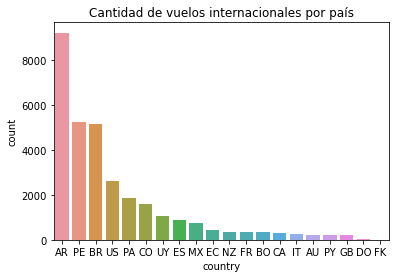

In [156]:
sns.countplot(x=df4[df4.TIPOVUELO=='I'].country,order=df4[df4.TIPOVUELO=='I'].country.value_counts().index)
plt.title('Cantidad de vuelos internacionales por país')
plt.show()

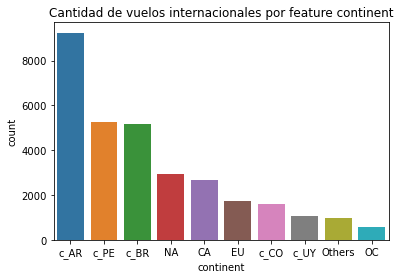

In [157]:
sns.countplot(x=df4.continent[df4.TIPOVUELO=='I'],order=df4[df4.TIPOVUELO=='I'].continent.value_counts().index)
plt.title('Cantidad de vuelos internacionales por feature continent')
plt.show()

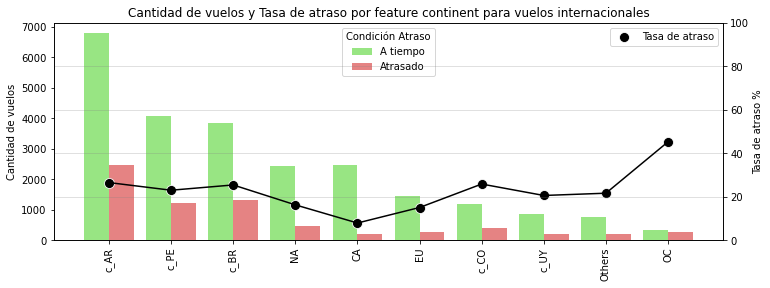

In [158]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df4[df4.TIPOVUELO=='I'],x='continent',hue='atraso_15',\
                    order=df4[df4.TIPOVUELO=='I'].continent.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,100])
y0= df4[(df4.atraso_15==1)&(df4.TIPOVUELO=='I')].continent.value_counts()/df4[df4.TIPOVUELO=='I'].continent.value_counts()*100
y0 = y0.reindex(df4[df4.TIPOVUELO=='I'].continent.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y Tasa de atraso por feature continent para vuelos internacionales')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)

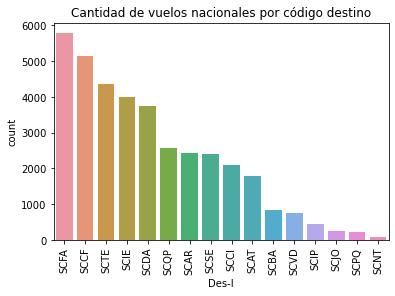

In [159]:
sns.countplot(x=df4[df4.TIPOVUELO=='N']['Des-I'],order=df4[df4.TIPOVUELO=='N']['Des-I'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de vuelos nacionales por código destino')
plt.show()

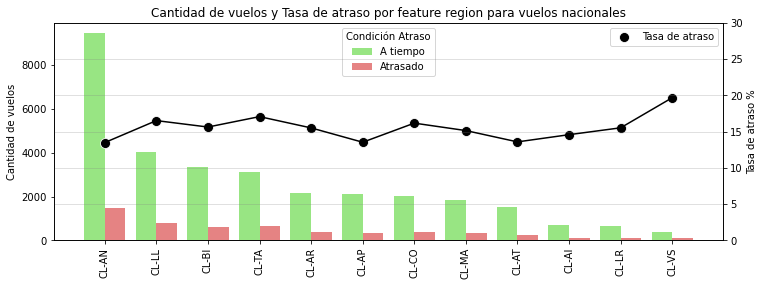

In [160]:
fig, axes = plt.subplots(1,1,figsize=(12,4))

ax = axes
sns.countplot(data=df4[df4.TIPOVUELO=='N'],x='region',hue='atraso_15',\
                    order=df4[df4.TIPOVUELO=='N'].region.value_counts().index,
                    ax=ax,palette=['#8FF573','#F57373'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['A tiempo','Atrasado'], loc='upper center', title='Condición Atraso')
ax.tick_params(axis='x', labelrotation = 90)

ax2 = ax.twinx()
ax2.set_ylim([0,30])
y0= df4[(df4.atraso_15==1)&(df4.TIPOVUELO=='N')].region.value_counts()/df4[df4.TIPOVUELO=='N'].region.value_counts()*100
y0 = y0.reindex(df4[df4.TIPOVUELO=='N'].region.value_counts().index)
sns.scatterplot(x=y0.index,y=y0,ax=ax2,color='k',s=100,label='Tasa de atraso')
sns.lineplot(x=y0.index,y=y0,ax=ax2,color='k')

ax.set_title('Cantidad de vuelos y Tasa de atraso por feature region para vuelos nacionales')
ax.set_ylabel('Cantidad de vuelos')
ax2.set_ylabel('Tasa de atraso %')
ax.set_xlabel('')
ax2.grid(color='grey',linestyle='-',alpha=0.3)

### Adaptación de datos para el entrenamiento de los modelos
Previo al entrenamiento de los modelos se procede a preparar los datos:
* Se ejecuta one-hot-encoder para las variables categóricas. Se elimina una columna para evitar la multicolinealidad, teniendo en cuenta que la columna eliminada no represente a una categoría mayoritaria en el dataset.
* Se estandarizan las variables continuas.
* Se unen DataFrames de variables categóricas codificadas con variables continuas estandarizadas.
* Se ejecuta división train/test con relación 80/20, y estratificando la muestra por la variable target para evitar desbalance en la misma en los conjuntos de train/test.
* Dado que el problema a enfrentar es de clasificación de clases desbalanceadas, se procede a aplicar un muestreo sintético para poder equiparar las clases de la variable target en el set de train. Para esto se aplica la técnica Synthetic Minority Oversampling Technique (SMOTE).

In [161]:
# Copy df4 and clean column names
df4_clean = df4.copy()
df4_clean.drop(['Fecha-I','Des-I','Emp-I','Emp-O','TIPOVUELO','des','emp','country','day'],axis=1,inplace=True)

df4_clean = df4_clean.rename(columns={'OPERA':'company','temporada_alta':'season','atraso_15':'y','periodo_dia':'day_period','continent':'int_dest','region':'nac_dest'})


# Create df with one hot encoder vars
df_enc = df4_clean.copy()

# Se crean las columnas dummies y se elimina una para evitar la multicolinealidad
company_dum = pd.get_dummies(df_enc['company'], prefix = "company")
company_dum.drop(['company_K.L.M.'],axis=1,inplace=True)

season_dum = pd.get_dummies(df_enc['season'], prefix = "season")
season_dum.drop('season_1',axis=1,inplace=True)

day_period_dum = pd.get_dummies(df_enc['day_period'], prefix = "day_period")
day_period_dum.drop('day_period_noche',axis=1,inplace=True)

nac_dest_dum = pd.get_dummies(df_enc['nac_dest'], prefix = "nac_dest")
nac_dest_dum.drop(['nac_dest_International'],axis=1,inplace=True)

int_dest_dum = pd.get_dummies(df_enc['int_dest'], prefix = "int_dest")
int_dest_dum.drop('int_dest_c_CL',axis=1,inplace=True)

weekday_dum = pd.get_dummies(df_enc['weekday'], prefix = "weekday")
weekday_dum.drop('weekday_Tuesday',axis=1,inplace=True)

df_enc = pd.concat([df_enc, company_dum,season_dum,day_period_dum,nac_dest_dum,int_dest_dum,weekday_dum],axis=1)
df_enc.drop(['company','season','day_period','int_dest','nac_dest','weekday'],axis=1,inplace=True)

# Se estandarizan variables continuas y se une dataframe con df_enc
df_cont = df_enc[['temp_mid','temp_max','temp_min', 'wind_speed', 'pressure']].copy()

sc_X = StandardScaler()
df_cont_std = pd.DataFrame(sc_X.fit_transform(df_cont),columns = df_cont.columns)

df_prepared = pd.concat([df_cont_std,df_enc.drop(columns=['temp_mid','temp_max','temp_min', 'wind_speed', 'pressure'])],axis=1)
#print(df_prepared.columns)

# Se separan variables dependientes y target
X1 = df_prepared.drop(columns='y').to_numpy()
y1 = df_prepared.y.to_numpy()

#Separación del set de datos
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=17,stratify=y1)

#Se identifican las posiciones de las variables categóricas en el DataFrame para aplicar SMOTE
var_cont = len(['temp_mid','temp_max','temp_min', 'wind_speed', 'pressure'])
cat_position_list = [*range(var_cont,df_prepared.columns.size-1)]
#print(cat_position_list)

# Se aplica muestreo sintetico
smote_nc = SMOTENC(random_state=17, categorical_features=cat_position_list)
X_S1, y_S1 = smote_nc.fit_resample(X_train1, y_train1)

Se verifica resultados de muestreo sintético:

In [162]:
print("y_train1")
print(pd.Series(y_train1).value_counts())
print("\ny_S1")
print(pd.Series(y_S1).value_counts())

y_train1
0    44473
1    10091
dtype: int64

y_S1
0    44473
1    44473
dtype: int64


### Entrenamiento de los modelos
Para predecir la probabilidad de atraso de los vuelos se seleccionará el mejor modelo de los siguientes:
* **Regresión Logística**: Se toma en cuenta por ser el modelo más simple. Es fácil de implementar, interpretar y entrenar, con bajo costo computacional. Aun así, hay que estar atentos al alto sesgo que puede producir la implementación de este modelo.
* **Random Forest**: Algoritmo muy eficiente para clasificaciones, que combina más de un decision tree; otorgando así menor sesgo a las predicciones con buenos resultados de métricas y estabilidad.
* **AdaBoost**: Algoritmo que permite combinar múltiples clasificadores considerados "débiles" (basados en decision trees), en un sólo clasificador.
* **XGBoost**: Algoritmo que usa árboles de decisión de poca profundidad, construidos secuencialmente. Su método de entrenamiento es altamente escalable y evita el sobreajuste.

Se generan funciones para generar las métricas de los modelos e imprimir resultados ahorrando líneas de código

In [163]:
# Se crea la función "metricas" para calcular los indicadores de la matríz de confusión.
def metricas (TN, FP, FN, TP):
    Sensibilidad = TP/(TP + FN) if TP + FN != 0  else 1
    Especifidad = TN / (TN + FP) if TN + FP != 0 else 1
    Exactitud = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN != 0 else 1
    Precision = TP / (TP + FP) if TP + FP != 0 else 1
    f1 = 2*TP / (2*TP + FP + FN) if 2*TP + FP + FN != 0 else 1  
    return Sensibilidad,Especifidad,Precision,Exactitud,f1

# Se crea la función "print_metrics" para calcular los indicadores de la matríz de confusión en distintos umbrales
def print_metrics (probabilidades, y_test, num_tr):

    df_prob = pd.DataFrame(probabilidades)
    df_metricas = pd.DataFrame(columns = [round(x/num_tr,2) for x in range(1, num_tr)], 
                               index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud','F1 Score'])

    for i in range(1,num_tr):
        df_prob['prediction']=np.where(df_prob[0]>i/num_tr,1,0)
        df_prob['actual'] = list(y_test)
        df_prob['actual'] = df_prob['actual'].apply(lambda x: int(x))
        TN, FP, FN, TP = confusion_matrix(df_prob['actual'],df_prob['prediction']).ravel()
        Sensibilidad,Especifidad,Precision,Exactitud,F1 = metricas(TN, FP, FN, TP)
        df_metricas[round(i/num_tr,2)] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                              'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                              'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2),
                                              'F1 Score':round(F1,4)})
    return df_metricas

#Se crea la función plot_model_results para graficar la matriz de confusión de los modelos, curva ROC y mostrar las métricas
def plot_model_results(pred_results=[], proba_results=[],model_name=[], figs = (14,10),y_test=[],hspace=0.35, wspace=0.2,div=1):
    dfm = pd.DataFrame(columns = model_name,index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud','F1 Score'])
    if len(pred_results) == 1:
        rows = len(pred_results)
        cols = 2
    else:
        rows = int(2*div)
        cols = int(len(pred_results)/div)        
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figs)
    axes = axes.T.flatten()
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    paleta_completa = [plt.cm.Blues,plt.cm.Greens,plt.cm.Oranges,plt.cm.Purples,plt.cm.Reds,plt.cm.Greys,plt.cm.PuBu,plt.cm.YlOrRd,plt.cm.BuGn]
    paleta = paleta_completa[0:len(pred_results)]
    colores_completos = ['blue','green','orange','purple','red','grey','cyan','pink','seagreen']
    colores = colores_completos[0:len(pred_results)]
    k = 0
    for i,j,q in zip(range(0,len(pred_results)),pred_results,proba_results):
        ax = axes[k]
        k+=1
        TN, FP, FN, TP = confusion_matrix(y_test[i],j, labels=[0,1]).ravel()
        sns.heatmap([[TN, FP],[FN, TP]], annot=True,cmap=paleta[i], fmt='g',ax=ax)
        ax.set_ylabel('Valores verdaderos')
        ax.set_xlabel('Valores predichos')
        ax.set_title('Matriz de Confusión '+model_name[i])
        ax = axes[k]
        k+=1
        fpr, tpr, thresholds = roc_curve(y_test[i], q)
        auc = roc_auc_score(y_test[i], q)
        ax.set_xlabel('FPR = 1-Especifidad')
        ax.set_ylabel('TPR = Sensibilidad')
        ax.plot(fpr, tpr, label="AUC "+model_name[i]+" = "+str(round(auc,4)),color=colores[i])
        ax.plot([0,1], [0,1], 'k--', color='grey')
        ax.set_title('Curva ROC '+model_name[i])
        ax.legend(loc='lower right')
        Sensibilidad,Especifidad,Precision,Exactitud, F1 = metricas (TN, FP, FN, TP)
        dfm[model_name[i]] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                        'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                        'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2),'F1 Score':round(F1,2)})
    plt.show()
    return dfm  

Se verifican columnas de features a utilizar:

In [164]:
df_prepared.columns

Index(['temp_mid', 'temp_max', 'temp_min', 'wind_speed', 'pressure', 'y',
       'company_Aerolineas Argentinas', 'company_Aeromexico',
       'company_Air Canada', 'company_Air France', 'company_Alitalia',
       'company_American Airlines', 'company_Austral', 'company_Avianca',
       'company_British Airways', 'company_Copa Air', 'company_Delta Air',
       'company_Gol Trans', 'company_Grupo LATAM', 'company_Iberia',
       'company_JetSmart SPA', 'company_Lacsa', 'company_Latin American Wings',
       'company_Oceanair Linhas Aereas', 'company_Plus Ultra Lineas Aereas',
       'company_Qantas Airways', 'company_Sky Airline',
       'company_United Airlines', 'season_0', 'day_period_mañana',
       'day_period_tarde', 'nac_dest_CL-AI', 'nac_dest_CL-AN',
       'nac_dest_CL-AP', 'nac_dest_CL-AR', 'nac_dest_CL-AT', 'nac_dest_CL-BI',
       'nac_dest_CL-CO', 'nac_dest_CL-LL', 'nac_dest_CL-LR', 'nac_dest_CL-MA',
       'nac_dest_CL-TA', 'nac_dest_CL-VS', 'int_dest_CA', 'int_dest_EU',
 

#### Regresión Logística (búsqueda de hiperparámetros, selección de mejores parámetros y entrenamiento)
Se buscan los mejores hiperparámetros tomando en cuenta:
* solver: Algoritmo a utilizar en el problema de optimización del modelo.
* penalty: Penalización para equiparar la magnitud de los coeficientes de regresión.
* C: Parámetro de regularización, en el que valores más pequeños especifican mayor regularización.

In [62]:
# Se declaran los parámetros a utilizar en el GridSearchCV el cual considerará hasta 1000 árboles.
lr_grid_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty': ['l2'],
               'C': [10000,1000,100, 10, 1.0, 0.1, 0.01,0.001,0.00001,0.000001]}

# Se declara el modelo a utilizar y la grilla completa de parámetros del GridSearch
lr = LogisticRegression(random_state=17)
lr_grid = GridSearchCV(estimator = lr, cv = 4, verbose=2, scoring='f1', 
                         n_jobs = -1,param_grid = lr_grid_params)

In [63]:
lr_grid.fit(X_S1,y_S1)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ..................C=10000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ..............C=10000, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ..............C=10000, penalty=l2, solver=liblinear; total time=   1.8s
[CV] END ..............C=10000, penalty=l2, solver=liblinear; total time=   1.8s
[CV] END ..............C=10000, penalty=l2, solver=liblinear; total time=   1.8s
[CV] END ..............C=10000, penalty=l2, solver=newton-cg; total time=   6.9s
[CV] END ..............C=10000, penalty=l2, solver=newton-cg; total time=   7.0s
[CV] END ..............C=10000, penalty=l2, solver=newton-cg; total time=   7.4s
[CV] END ...............C=1000, penalty=l2, solver=newton-cg; total time=   5.5s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ..............C=10000, penalty=l2, solver=newton-cg; total time=   8.4s
[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   1.0s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...............C=1000, penalty=l2, solver=newton-cg; total time=   6.4s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ...............C=1000, penalty=l2, solver=newton-cg; total time=   6.8s
[CV] END ...............C=1000, penalty=l2, solver=newton-cg; total time=   6.8s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   2.2s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   2.1s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   2.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.9s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   5.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   4.6s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   5.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   5.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   3.5s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   3.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   3.4s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   3.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   1.0s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.9s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   2.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   2.0s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   1.9s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   1.9s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s


/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=17), n_jobs=-1,
             param_grid={'C': [10000, 1000, 100, 10, 1.0, 0.1, 0.01, 0.001,
                               1e-05, 1e-06],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1', verbose=2)

In [64]:
best_estimator_lr = lr_grid.best_params_
print(best_estimator_lr)
best_score_lr = lr_grid.best_score_
print(best_score_lr)

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6718185210018521


In [165]:
# Modelo LR
lr = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', random_state=17)
lr_model = lr.fit(X_S1,y_S1)
proba_lr = lr_model.predict_proba(X_test1)[:,1]

#### Random Forest (búsqueda de hiperparámetros, selección de mejores parámetros y entrenamiento)
Se buscan los mejores hiperparámetros tomando en cuenta:
* n_estimators: Cantidad de árboles de decisión.
* max_depth: Máxima profundidad o cantidad de niveles del árbol.
* min_samples_split: El número mínimo de muestras para decidir si un nodo interno se expande en el algoritmo.
* min_samples_leaf: La cantidad mínima de muestras requeridas para determinar un nodo "hoja".
* bootstrap: Determina si usar bootstrap sampling para construir los árboles o todo el dataset.
* criterion: Criterio para determinar la ganancia de información.

In [66]:
# Se declaran los parámetros a utilizar en el GridSearchCV el cual considerará hasta 1000 árboles.
random_grid = {'n_estimators': [20,100,1000],
               'max_depth': [2,5,10],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,3],
               'bootstrap': [True, False],
               'criterion':['gini','entropy']}

# Se declara el modelo a utilizar y la grilla completa de parámetros del GridSearch
rf = RandomForestClassifier(random_state=17)
rf_random = GridSearchCV(estimator = rf, cv = 5, verbose=2, scoring='f1', 
                         n_jobs = -1,param_grid = random_grid)

In [67]:
rf_random.fit(X_S1,y_S1)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstra

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 100, 1000]},
             scoring='f1', verbose=2)

In [68]:
best_estimator_rf = rf_random.best_params_
print(best_estimator_rf)
best_score_rf = rf_random.best_score_
print(best_score_rf)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
0.7162901214317084


In [166]:
# Modelo RF
rf_model=RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1,n_estimators=20,random_state=17)
rf_model.fit(X_S1,y_S1)
proba_rf = rf_model.predict_proba(X_test1)[:,1]

#### AdaBoost (búsqueda de hiperparámetros, selección de mejores parámetros y entrenamiento)
Se buscan los mejores hiperparámetros tomando en cuenta:
* n_estimators: Cantidad máxima de estimadores para finalizar el boosting.
* learning_rate: Pesos aplicados a cada clasificador en cada una de las iteraciones de boosting. Mientras mayor es la tasa de aprendizaje, mayor es la contribución para cada clasificador.

In [70]:
# Se declaran los parámetros a utilizar en el GridSearchCV el cual considerará hasta 3000 estimadores
ada_parametros = [{'n_estimators': [20,500,1000,3000],
               'learning_rate' : [0.0001,0.001,0.01,0.1]}] 

# Se declara el modelo a utilizar y la grilla completa de parámetros del GridSearch
ada = AdaBoostClassifier(random_state=17)
ada_grid = GridSearchCV(estimator = ada, cv = 5, verbose=2, scoring='f1', 
                         n_jobs = -1,param_grid = ada_parametros)

In [71]:
ada_grid_search = ada_grid.fit(X_S1, y_S1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..............learning_rate=0.0001, n_estimators=20; total time=   2.6s
[CV] END ..............learning_rate=0.0001, n_estimators=20; total time=   2.6s
[CV] END ..............learning_rate=0.0001, n_estimators=20; total time=   2.8s
[CV] END ..............learning_rate=0.0001, n_estimators=20; total time=   2.8s
[CV] END ..............learning_rate=0.0001, n_estimators=20; total time=   2.8s
[CV] END .............learning_rate=0.0001, n_estimators=500; total time=  53.4s
[CV] END .............learning_rate=0.0001, n_estimators=500; total time=  54.5s
[CV] END .............learning_rate=0.0001, n_estimators=500; total time=  55.0s
[CV] END .............learning_rate=0.0001, n_estimators=500; total time=  53.4s
[CV] END .............learning_rate=0.0001, n_estimators=500; total time=  53.6s
[CV] END ............learning_rate=0.0001, n_estimators=1000; total time= 1.8min
[CV] END ............learning_rate=0.0001, n_est

In [72]:
best_f1 = ada_grid_search.best_score_
print(best_f1)
best_parameters = ada_grid_search.best_params_
print(best_parameters)

0.702832237503506
{'learning_rate': 0.1, 'n_estimators': 3000}


In [167]:
# Modelo Adaboost con los mejores parámetros obtenidos
ada_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=3000)
ada_clf.fit(X_S1, y_S1)
proba_ada = ada_clf.predict_proba(X_test1)[:,1]

#### XGBoost (búsqueda de hiperparámetros, selección de mejores parámetros y entrenamiento)
Se buscan los mejores hiperparámetros tomando en cuenta:
* n_estimators: Cantidad de árboles "gradient boosted"
* gamma: Mínima pérdida requerida para particionar un nodo en hojas en el árbol.
* subsample: Tasa de submuestreo en la fase de training. Esto ayuda a prevenir el sobreajuste.
* max_depth: Máxima profundidad o cantidad de niveles de los base learners.
* learning_rate: Tasa de aprendizaje para boosting. Mientras mayor es la tasa de aprendizaje, mayor es la contribución o peso en cada clasificador.

In [74]:
# Se declaran los parámetros a utilizar en el GridSearchCV e
xgb_params = {
        'n_estimators': [20,100],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.001,0.01,0.1,0.2,0.3]
        }

# Se declara el modelo a utilizar y la grilla completa de parámetros del GridSearch
xgboost = xgb.XGBClassifier(random_state=17, objective='binary:logistic')
xgb_grid = GridSearchCV(estimator = xgboost, cv = 5, verbose=2, scoring='f1', 
                         n_jobs = -1,param_grid = xgb_params)

In [75]:
xgb_grid.fit(X_S1, y_S1)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.6; total time=   3.0s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.6; total time=   3.0s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.6; total time=   3.2s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.8; total time=   2.8s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=1.0; total time=   3.1s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.8; total time=   3.5s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.8; total time=   3.4s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.8; total time=   3.4s
[CV] END gamma=0.5, learning_rate=0.001, max_depth=3, n_estimators=20, subsample=0.6; total time

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=17, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 2, 5],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6], 'n_estimators': [20, 100],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [76]:
best_f1 = xgb_grid.best_score_
print(best_f1)
best_parameters = xgb_grid.best_params_
print(best_parameters)

0.7905052144261433
{'gamma': 2, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}


A pesar de que la cantidad de estimadores resultantes fueron 100, con pruebas manuales y 1000 estimadores se ubtuvo un mejor performance en el modelo, por lo que se procede a utilizar esta cantidad para XGBoost. El valor de 1000 estimadores no se incluyó en la grilla de hiperparámetros ya que resultaba en un costo computacional muy alto para correr todas las iteraciones.

In [168]:
# Modelo XGBoost  con los mejores parámetros obtenidos
xgb_clf = xgb.XGBClassifier(subsample=0.8, max_depth=6, gamma=2, learning_rate=0.3,n_estimators=1000)
xgb_clf.fit(X_S1, y_S1)
proba_xgb = xgb_clf.predict_proba(X_test1)[:,1]

## 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

Se imprimen las métricas para los modelos entrenados

In [169]:
#Métricas Regresión Logística
df_metricas_reg = print_metrics(proba_lr,y_test1,20)
df_metricas_reg

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,2523.0000,2521.0000,2519.0000,2509.0000,2450.0000,2327.0000,2132.0000,1863.000,1526.0000,1179.0000,892.0000,654.0000,424.0000,238.0000,122.0000,55.0000,22.0000,0.00,0.00
FN,0.0000,2.0000,4.0000,14.0000,73.0000,196.0000,391.0000,660.000,997.0000,1344.0000,1631.0000,1869.0000,2099.0000,2285.0000,2401.0000,2468.0000,2501.0000,2523.00,2523.00
FP,11119.0000,11113.0000,11047.0000,10869.0000,10264.0000,8968.0000,7388.0000,5629.000,4160.0000,2945.0000,2016.0000,1283.0000,670.0000,300.0000,94.0000,27.0000,8.0000,0.00,0.00
TN,0.0000,6.0000,72.0000,250.0000,855.0000,2151.0000,3731.0000,5490.000,6959.0000,8174.0000,9103.0000,9836.0000,10449.0000,10819.0000,11025.0000,11092.0000,11111.0000,11119.00,11119.00
Sensibilidad,1.0000,1.0000,1.0000,0.9900,0.9700,0.9200,0.8500,0.740,0.6000,0.4700,0.3500,0.2600,0.1700,0.0900,0.0500,0.0200,0.0100,0.00,0.00
Especifidad,0.0000,0.0000,0.0100,0.0200,0.0800,0.1900,0.3400,0.490,0.6300,0.7400,0.8200,0.8800,0.9400,0.9700,0.9900,1.0000,1.0000,1.00,1.00
Precision,0.1800,0.1800,0.1900,0.1900,0.1900,0.2100,0.2200,0.250,0.2700,0.2900,0.3100,0.3400,0.3900,0.4400,0.5600,0.6700,0.7300,1.00,1.00
Exactitud,0.1800,0.1900,0.1900,0.2000,0.2400,0.3300,0.4300,0.540,0.6200,0.6900,0.7300,0.7700,0.8000,0.8100,0.8200,0.8200,0.8200,0.82,0.82
F1 Score,0.3122,0.3121,0.3131,0.3156,0.3216,0.3368,0.3541,0.372,0.3718,0.3547,0.3285,0.2933,0.2344,0.1555,0.0891,0.0422,0.0172,0.00,0.00


In [170]:
#Métricas Random Forest
df_metricas_rf = print_metrics(proba_rf,y_test1,20)
df_metricas_rf

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,2523.0000,2523.0000,2523.0000,2519.0000,2503.0000,2442.0000,2295.0000,2094.0000,1901.0000,1505.0000,981.0000,401.0000,159.0000,68.0000,19.0000,5.000,0.00,0.00,0.00
FN,0.0000,0.0000,0.0000,4.0000,20.0000,81.0000,228.0000,429.0000,622.0000,1018.0000,1542.0000,2122.0000,2364.0000,2455.0000,2504.0000,2518.000,2523.00,2523.00,2523.00
FP,11119.0000,11119.0000,11119.0000,11059.0000,10805.0000,10101.0000,8724.0000,7339.0000,6065.0000,3941.0000,2027.0000,506.0000,109.0000,34.0000,7.0000,3.000,0.00,0.00,0.00
TN,0.0000,0.0000,0.0000,60.0000,314.0000,1018.0000,2395.0000,3780.0000,5054.0000,7178.0000,9092.0000,10613.0000,11010.0000,11085.0000,11112.0000,11116.000,11119.00,11119.00,11119.00
Sensibilidad,1.0000,1.0000,1.0000,1.0000,0.9900,0.9700,0.9100,0.8300,0.7500,0.6000,0.3900,0.1600,0.0600,0.0300,0.0100,0.000,0.00,0.00,0.00
Especifidad,0.0000,0.0000,0.0000,0.0100,0.0300,0.0900,0.2200,0.3400,0.4500,0.6500,0.8200,0.9500,0.9900,1.0000,1.0000,1.000,1.00,1.00,1.00
Precision,0.1800,0.1800,0.1800,0.1900,0.1900,0.1900,0.2100,0.2200,0.2400,0.2800,0.3300,0.4400,0.5900,0.6700,0.7300,0.620,1.00,1.00,1.00
Exactitud,0.1800,0.1800,0.1800,0.1900,0.2100,0.2500,0.3400,0.4300,0.5100,0.6400,0.7400,0.8100,0.8200,0.8200,0.8200,0.820,0.82,0.82,0.82
F1 Score,0.3122,0.3122,0.3122,0.3129,0.3162,0.3242,0.3389,0.3503,0.3625,0.3777,0.3547,0.2338,0.1139,0.0518,0.0149,0.004,0.00,0.00,0.00


In [171]:
#Métricas AdaBoost
df_metricas_ada = print_metrics(proba_ada,y_test1,20)
df_metricas_ada

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,2523.0000,2523.0000,2523.0000,2523.0000,2523.0000,2523.0000,2523.0000,2523.0000,2523.0000,1156.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1367.000,2523.00,2523.00,2523.00,2523.00,2523.00,2523.00,2523.00,2523.00,2523.00
FP,11119.0000,11119.0000,11119.0000,11119.0000,11119.0000,11119.0000,11119.0000,11119.0000,11119.0000,2672.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8447.000,11119.00,11119.00,11119.00,11119.00,11119.00,11119.00,11119.00,11119.00,11119.00
Sensibilidad,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.460,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Especifidad,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.760,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Precision,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.300,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Exactitud,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.700,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
F1 Score,0.3122,0.3122,0.3122,0.3122,0.3122,0.3122,0.3122,0.3122,0.3122,0.364,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [172]:
#Métricas XGBoost
df_metricas_xgb = print_metrics(proba_xgb,y_test1,20)
df_metricas_xgb

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,2278.0000,2016.0000,1800.0000,1606.000,1427.0000,1292.0000,1156.0000,1046.0000,930.0000,840.000,743.0000,649.000,555.0000,473.0000,390.0000,308.0000,222.0000,127.0000,49.0000
FN,245.0000,507.0000,723.0000,917.000,1096.0000,1231.0000,1367.0000,1477.0000,1593.0000,1683.000,1780.0000,1874.000,1968.0000,2050.0000,2133.0000,2215.0000,2301.0000,2396.0000,2474.0000
FP,7907.0000,5993.0000,4730.0000,3782.000,3133.0000,2600.0000,2148.0000,1785.0000,1516.0000,1265.000,1049.0000,846.000,689.0000,510.0000,385.0000,243.0000,134.0000,59.0000,16.0000
TN,3212.0000,5126.0000,6389.0000,7337.000,7986.0000,8519.0000,8971.0000,9334.0000,9603.0000,9854.000,10070.0000,10273.000,10430.0000,10609.0000,10734.0000,10876.0000,10985.0000,11060.0000,11103.0000
Sensibilidad,0.9000,0.8000,0.7100,0.640,0.5700,0.5100,0.4600,0.4100,0.3700,0.330,0.2900,0.260,0.2200,0.1900,0.1500,0.1200,0.0900,0.0500,0.0200
Especifidad,0.2900,0.4600,0.5700,0.660,0.7200,0.7700,0.8100,0.8400,0.8600,0.890,0.9100,0.920,0.9400,0.9500,0.9700,0.9800,0.9900,0.9900,1.0000
Precision,0.2200,0.2500,0.2800,0.300,0.3100,0.3300,0.3500,0.3700,0.3800,0.400,0.4100,0.430,0.4500,0.4800,0.5000,0.5600,0.6200,0.6800,0.7500
Exactitud,0.4000,0.5200,0.6000,0.660,0.6900,0.7200,0.7400,0.7600,0.7700,0.780,0.7900,0.800,0.8100,0.8100,0.8200,0.8200,0.8200,0.8200,0.8200
F1 Score,0.3585,0.3828,0.3977,0.406,0.4029,0.4028,0.3968,0.3907,0.3743,0.363,0.3444,0.323,0.2947,0.2698,0.2365,0.2004,0.1542,0.0938,0.0379


Se selecciona el mejor umbral de las probabilidades obtenidos para la toma de decisiones de acuerdo al F1-score

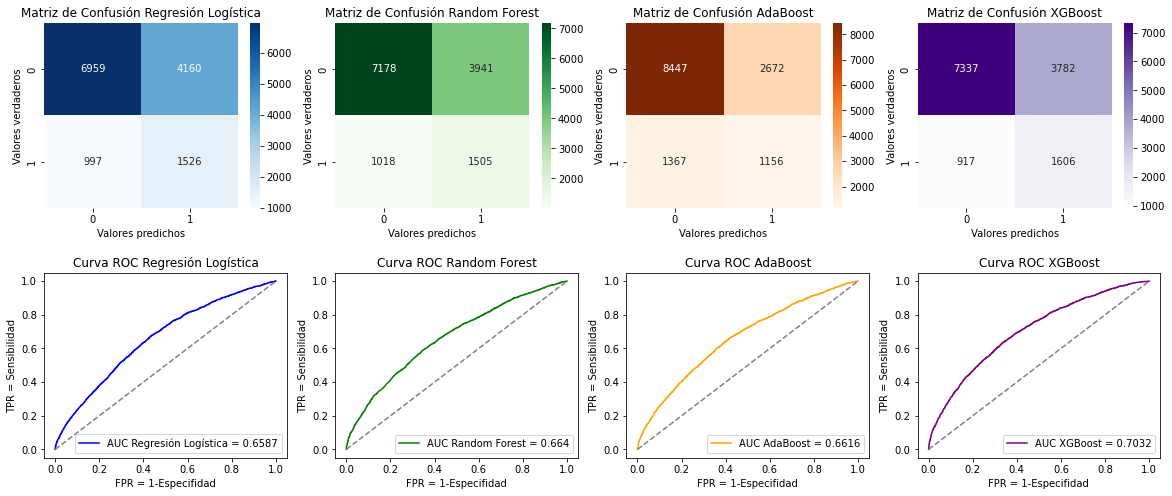

,TP,FN,FP,TN,Sensibilidad,Especifidad,Precision,Exactitud,F1 Score
Regresión Logística,1526.0,997.0,4160.0,6959.0,0.60,0.63,0.27,0.62,0.37
Random Forest,1505.0,1018.0,3941.0,7178.0,0.60,0.65,0.28,0.64,0.38
AdaBoost,1156.0,1367.0,2672.0,8447.0,0.46,0.76,0.30,0.70,0.36
XGBoost,1606.0,917.0,3782.0,7337.0,0.64,0.66,0.30,0.66,0.41


In [173]:
# Definición de mejor umbbral para modelos de acuerdo a F1-score
predictions_lr = np.where(proba_lr>0.45,1,0)
predictions_rf = np.where(proba_rf>0.5,1,0)
predictions_ada = np.where(proba_ada>0.5,1,0)
predictions_xgb = np.where(proba_xgb>0.2,1,0)

results_bestf1thd = plot_model_results( pred_results=[predictions_lr,predictions_rf,predictions_ada,predictions_xgb],
                                        proba_results=[proba_lr,proba_rf,proba_ada,proba_xgb],
                                        model_name=["Regresión Logística","Random Forest","AdaBoost","XGBoost"], figs = (20,8),
                                        y_test=[y_test1,y_test1,y_test1,y_test1])

results_bestf1thd.transpose()

### Selección de modelo
#### Se selecciona el modelo XGBoost

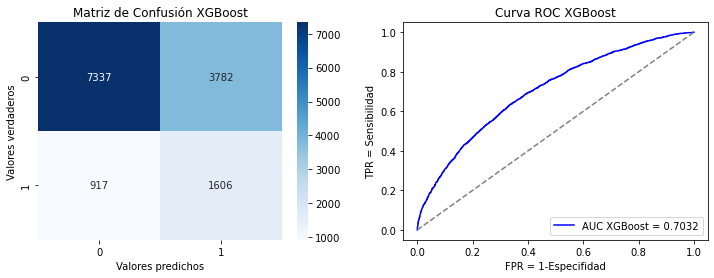

,TP,FN,FP,TN,Sensibilidad,Especifidad,Precision,Exactitud,F1 Score
XGBoost,1606.0,917.0,3782.0,7337.0,0.64,0.66,0.3,0.66,0.41


In [174]:
results_selected = plot_model_results( pred_results=[predictions_xgb],
                                        proba_results=[proba_xgb],
                                        model_name=["XGBoost"], figs = (12,4),
                                        y_test=[y_test1])

results_selected.transpose()

**¿Qué performance tiene?**
* El modelo tiene un F1-Score de 0.41, el cual fue el mejor valor obtenido con las iteraciones utilizando distintos features y distintos modelos. Es el que tiene mejor sensibilidad y precisión a su vez.
* Destacando la precisión, que es de 0.3, podría decirse que, en casos prácticos, de los vuelos que se está afirmando que van a estar retrasados, al menos un 30% estarían realmente restrasados; lo que sería una ganancia respecto a afirmar desde el caso genérico que de todos los vuelos se retrasará el 20%. Dado esto, se reduce la muestra de posibles vuelos retrasados para tomar futuras acciones sobre una muestra más pequeña.
* Destacando la sensibilidad, se puede decir que si se toman las acciones sobre todos los vuelos que se están afirmando como atrasados, se estarían identificando un 64% de los vuelos atrasados totales, lo cual es destacable si se pueden tomar acciones para que no se atrasen.
* El modelo resultó con un área bajo la curva ROC de 0.70, siendo la mejor entre todos los modelos iterados.

**¿Qué métricas usaste para evaluar esa performance y por qué?**
* Se utiliza la métrica F1-score para determinar el performance del modelo, ya que el foco del modelo es determinar si un vuelo está atrasado, por lo que se prioriza y balancea la identificación de positivos, teniendo en cuenta que el F1-score es la media armónica entre la precisión y recall (sensibilidad), las cuales son métricas que están estrechamente relacionadas a la identificación de positivos.
* Adicionalmente se evaluó el área bajo la curva ROC, la cual es útil para observar cómo de comportan el True Positive Rate y False Poritive Rate respecto a los distintos umbrales de probabilidad. Mientras mayor es el área bajo la curva, mayor flexibilidad y mejores resultados habrá en el modelo tomando las decisiones con distintos umbrales de probabilidad.

**¿Por qué elegiste ese algoritmo en particular?**
Se seleccionó XGBoost porque es un algoritmo que generalmente tiene un buen performance. Minimiza los errores de una manera eficiente, el entrenamiento es continuo e iterativo, insertando nuevos árboles que predicen los errores residuales de los árboles de decisión de las iteraciones anteriores, los cuales pueden ser combinados entre sí. Adicionalmente, es altamente eficiente en la prevención del sobreajuste.


**¿Qué variables son las que más influyen en la predicción?** 

Se visualiza la importancia de features

Text(0, 0.5, '% Importancia Feature')

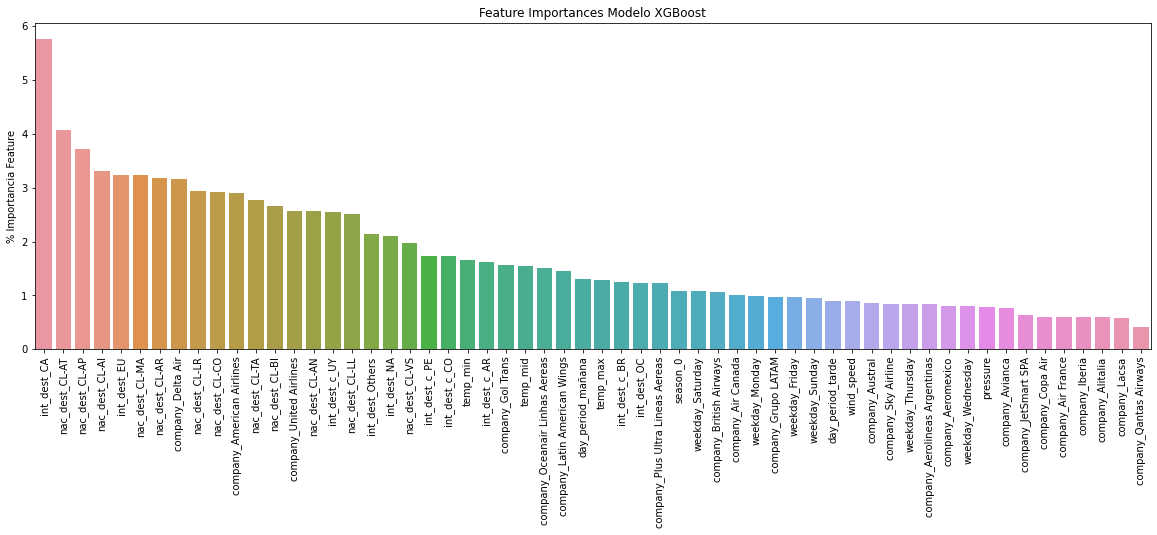

In [85]:
xgb_importances = pd.DataFrame(100*xgb_clf.feature_importances_, index=df_prepared.drop('y',axis=1).columns,columns=['imp'])
#xgb_importances.sort_values('imp',ascending=False)
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax = sns.barplot(x=xgb_importances.index,y=xgb_importances.imp, order=xgb_importances.sort_values('imp',ascending=False).index,ax=ax)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_title('Feature Importances Modelo XGBoost')
ax.set_ylabel('% Importancia Feature')

* Se puede observar que para los resultados con el algoritmo XGBoost, las variables que más influyeron en la predicción fueron algunos destinos nacionales e internacionales. Luego con menor importancia en la predicción se encuentran algunas aerolíneas y datos de temperatura.
* La importancia de features inicia desde valores casi 6% y luego va decreciendo de acuerdo al orden mostrado en el gráfico.

**¿Cómo podrías mejorar la performance?**

En el presente desafío se hicieron varios esfuerzos en mejorar la performance del modelo:
* Ejecutando ingeniería de features con las variables iniciales
* Agregando datos climáticos utilizando fuentes externas al dataset

Adicionalmente, se evaluaron distintos modelos, para los que se aplicó búsqueda de hiperparámetros óptimos.

Dado esto, una forma de mejorar la performance sería contar con variables que puedan contextualizar mejor las causas de un atraso, como lo podrían ser: capacidad de pasajeros de los aviones, modelo de avión, estado de mantenimiento de los aviones, cantidad de pasajeros de los vuelos, edad y género de los pasajeros, etc. Estos ejemplos son mencionados desde la visión de que los atrasos de los vuelos pueden ser causados por los pasajeros o temas mecánicos de los aviones, pero en la visión de datos de la compañía podrían haber otros datos que pudiesen estar más correlacionados o ayudar mejor a explicar por qué se retrasa un vuelo.